The dataset contains customer data related to online delivery services. The data includes various demographic and feedback attributes such as age, gender, marital status, occupation, monthly income, educational qualifications, family size, location coordinates (latitude and longitude), pin code, and multiple service-related quality metrics (e.g., delivery time, package quality, number of calls, politeness, freshness, temperature, taste, quantity). Additionally, there is an "Output" column which seems to indicate customer satisfaction ("Yes" or "No"), and a "Reviews" column containing textual feedback.

In [54]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

We're bringing in several tools and functions to help us work with data. Think of these as the different tools you might need for a specific job, like a hammer, screwdriver, and wrench for a construction project. Here, we have tools for handling data (pandas), tools for making predictions (DecisionTreeClassifier, RandomForestClassifier), and tools for measuring how well our predictions work (accuracy_score, precision_score, etc.).
import pandas as pd.

In [ ]:
le=LabelEncoder( ) #LabelEncoder is a preprocessing technique that converts categorical labels into numerical values, making them suitable for machine learning algorithms

In [59]:
df=pd.read_csv(r"D:\Trimester 4\Machine Learning\onlinedeliverydata.csv")

We're loading our data from a file into a table (dataframe) that we can work with in Python. Imagine opening a spreadsheet in Excel to start analysing it.

In [62]:
df.describe() #Provides statistics like average, minimum, and maximum values.

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [64]:
df.head() #Shows the first few rows of the data.

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [66]:
df.tail() #Shows the last few rows of the data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,Important,Important,Important,Important,Important,Important,Important,Important,Yes,Nil
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,Moderately Important,Very Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes,Nil
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,...,Important,Very Important,Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,...,Important,Very Important,Important,Very Important,Very Important,Important,Very Important,Very Important,Yes,Language barrier is also one major issue. Mosl...
387,23,Male,Single,Student,No Income,Post Graduate,5,12.8988,77.5764,560078,...,Slightly Important,Unimportant,Slightly Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Slightly Important,Yes,Nil


In [68]:
df.shape #Tells us how many rows and columns are in the data.

(388, 55)

In [70]:
df.dtypes #Shows the type of data in each column (e.g., numbers or text).

Age                                            int64
Gender                                        object
Marital Status                                object
Occupation                                    object
Monthly Income                                object
Educational Qualifications                    object
Family size                                    int64
latitude                                     float64
longitude                                    float64
Pin code                                       int64
Medium (P1)                                   object
Medium (P2)                                   object
Meal(P1)                                      object
Meal(P2)                                      object
Perference(P1)                                object
Perference(P2)                                object
Ease and convenient                           object
Time saving                                   object
More restaurant choices                       

In [72]:
df.isna().sum() #Counts how many missing values are in each column.

Age                                          0
Gender                                       0
Marital Status                               0
Occupation                                   0
Monthly Income                               0
Educational Qualifications                   0
Family size                                  0
latitude                                     0
longitude                                    0
Pin code                                     0
Medium (P1)                                  0
Medium (P2)                                  0
Meal(P1)                                     0
Meal(P2)                                     0
Perference(P1)                               0
Perference(P2)                               0
Ease and convenient                          0
Time saving                                  0
More restaurant choices                      0
Easy Payment option                          0
More Offers and Discount                     0
Good Food qua

In [74]:
df['Reviews'].mode( ) # Returns the most frequent value(s) in the 'Reviews' column of the DataFrame `df`. This is used to identify the mode of the column, which can help in deciding what value to fill in for any missing entries in that column. In this context, it's likely being used to determine the common value to replace missing 'Reviews' entries with a standard one, ensuring data completeness.  

0    NIL
Name: Reviews, dtype: object

In [76]:
df['Reviews'].fillna('NIL',inplace=True) # It replaces any missing values (NaNs) in the 'Reviews' column of the DataFrame `df` with the string 'NIL'. This ensures there are no missing values in the 'Reviews' column, which helps maintain data consistency and completeness.  

In [78]:
#pandas is imported as pd to handle data manipulation and analysis within DataFrames.
#LabelEncoder from sklearn.preprocessing is imported to convert categorical text data into numerical data.
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#A list named categorical_columns is created to hold the names of columns that contain categorical data. These columns will be encoded later.
categorical_columns = [
    'Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 
    'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)', 'Perference(P1)', 
    'Perference(P2)', 'Ease and convenient', 'Time saving', 'More restaurant choices', 
    'Easy Payment option', 'More Offers and Discount', 'Good Food quality', 
    'Good Tracking system', 'Self Cooking', 'Health Concern', 'Late Delivery', 
    'Poor Hygiene', 'Bad past experience', 'Unavailability', 'Unaffordable', 
    'Long delivery time', 'Delay of delivery person getting assigned', 
    'Delay of delivery person picking up food', 'Wrong order delivered', 
    'Missing item', 'Order placed by mistake', 'Influence of time', 'Order Time', 
    'Residence in busy location', 'Google Maps Accuracy', 'Good Road Condition', 
    'Delivery person ability', 'Influence of rating', 'High Quality of package', 
    'Politeness', 'Freshness ', 'Temperature', 'Good Taste ', 'Good Quantity', 'Output'
]

le = LabelEncoder() # le is an instance of LabelEncoder, which is used for converting categorical string data in the dataset to numerical data.


for column in categorical_columns:
    if column in df.columns:
        df[column + '_Enc'] = le.fit_transform(df[column])
# Loop: The for loop iterates through each column name in the categorical_columns list.
#Condition Check: The if statement checks if the current column exists in the DataFrame df. This ensures that the loop does not attempt to encode a column that is not present in the DataFrame.
#Encoding: le.fit_transform(df[column]) encodes the categorical values in the specified column, converting them from strings or categories to integers.
#The encoded values are assigned to a new column in the DataFrame df with the name column + '_Enc'. For example, if column is 'Gender', the new column will be named 'Gender_Enc'.
print(df.head())
# This line prints the first few rows of the DataFrame df to visualize the changes and ensure the encoding was successful.
#df.head() returns the first 5 rows of the DataFrame.

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  ...  \
0              Post Graduate            4   12.9766    77.5993    560001  ...   
1                   Graduate            3   12.9770    77.5773    560009  ...   
2              Post Graduate            3   12.9551    77.6593    560017  ...   
3                   Graduate            6   12.9473    77.5616    560019  ...   
4              Post Graduate            4   12.9850    77.5533    560010  ...   

  Good Road Condition_Enc Delivery person ability_Enc Influence of rating_Enc  \
0                       2                           2                  

In [80]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

all_columns = [
    'Age', 'Gender_Enc', 'Marital Status_Enc', 'Occupation_Enc', 'Monthly Income_Enc',
    'Educational Qualifications_Enc', 'Family size', 'latitude', 'longitude', 'Pin code',
    'Medium (P1)_Enc', 'Medium (P2)_Enc', 'Meal(P1)_Enc', 'Meal(P2)_Enc', 
    'Perference(P1)_Enc', 'Perference(P2)_Enc', 'Ease and convenient_Enc', 'Time saving_Enc',
    'More restaurant choices_Enc', 'Easy Payment option_Enc', 'More Offers and Discount_Enc', 
    'Good Food quality_Enc', 'Good Tracking system_Enc', 'Self Cooking_Enc', 'Health Concern_Enc', 
    'Late Delivery_Enc', 'Poor Hygiene_Enc', 'Bad past experience_Enc', 'Unavailability_Enc', 
    'Unaffordable_Enc', 'Long delivery time_Enc', 'Delay of delivery person getting assigned_Enc', 
    'Delay of delivery person picking up food_Enc', 'Wrong order delivered_Enc', 'Missing item_Enc', 
    'Order placed by mistake_Enc', 'Influence of time_Enc', 'Order Time_Enc', 'Maximum wait time', 
    'Residence in busy location_Enc', 'Google Maps Accuracy_Enc', 'Good Road Condition_Enc', 
    'Low quantity low time', 'Delivery person ability_Enc', 'Influence of rating_Enc', 
    'Less Delivery time', 'High Quality of package_Enc', 'Number of calls', 'Politeness_Enc', 
    'Freshness _Enc', 'Temperature_Enc', 'Good Taste _Enc', 'Good Quantity_Enc', 'Reviews'
]

# We're deciding which parts of the data we want to use to make predictions (X) and what we want to predict (Y). It's like deciding what information to use to guess someone's age (e.g., their job, education, and hobbies).
X = df[all_columns]
Y = df[['Output_Enc']]

# Display the first few rows of X and Y to check
print(X.head())
print(Y.head())

   Age  Gender_Enc  Marital Status_Enc  Occupation_Enc  Monthly Income_Enc  \
0   20           0                   2               3                   4   
1   24           0                   2               3                   2   
2   22           1                   2               3                   2   
3   22           0                   2               3                   4   
4   22           1                   2               3                   2   

   Educational Qualifications_Enc  Family size  latitude  longitude  Pin code  \
0                               2            4   12.9766    77.5993    560001   
1                               0            3   12.9770    77.5773    560009   
2                               2            3   12.9551    77.6593    560017   
3                               0            6   12.9473    77.5616    560019   
4                               2            4   12.9850    77.5533    560010   

   ...  Influence of rating_Enc    Less Deli

In [82]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3) # We're splitting our data into two groups: one to teach the computer (training set) and one to test how well it learned (testing set). The test size of 0.3 means 30% of the data is for testing.

In [84]:
dt=DecisionTreeClassifier() #We're creating a decision tree model and teaching it using our training data. A decision tree is like a flowchart that helps make predictions based on certain rules.

In [86]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv(r"D:\Trimester 4\Machine Learning\onlinedeliverydata.csv")

# Fill missing values in 'Reviews' column with 'NIL'
df['Reviews'].fillna('NIL', inplace=True)

# Encode categorical variables
le = LabelEncoder()

# Encoding all categorical columns
categorical_columns = [
    'Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications',
    'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)', 'Perference(P1)', 'Perference(P2)',
    'Ease and convenient', 'Time saving', 'More restaurant choices', 'Easy Payment option',
    'More Offers and Discount', 'Good Food quality', 'Good Tracking system', 
    'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene', 'Bad past experience'
]

for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

# Select features and target
X = df[[
    'Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications',
    'Family size', 'latitude', 'longitude', 'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
    'Perference(P1)', 'Perference(P2)', 'Ease and convenient', 'Time saving', 'More restaurant choices',
    'Easy Payment option', 'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
    'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene', 'Bad past experience'
]]
Y = df[['Output']]

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize and fit the DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [88]:
df.head(2)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil


Columns in the DataFrame:
Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery perso

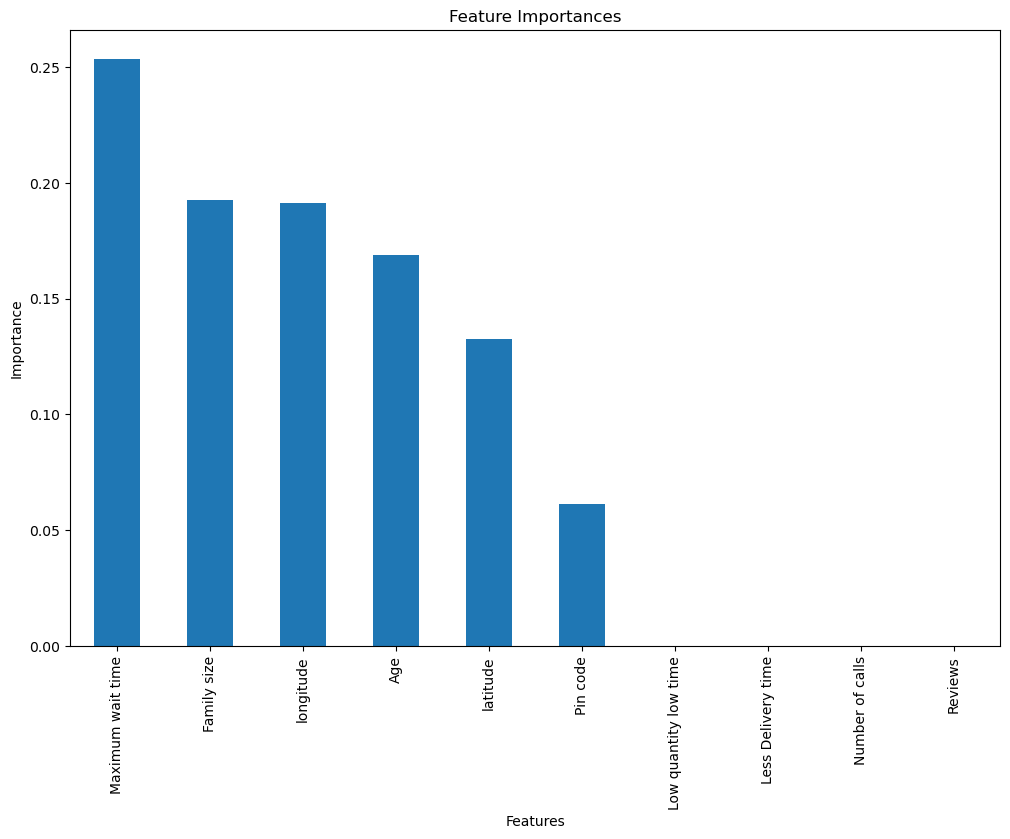

In [90]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Check the columns in the DataFrame
print("Columns in the DataFrame:")
print(df.columns)

# Check if the 'Output' column exists and encode it if necessary
if 'Output' in df.columns:
    le = LabelEncoder()
    df['Output_Enc'] = le.fit_transform(df['Output'])
else:
    print("Error: 'Output' column not found in the DataFrame.")

# Define the list of columns (based on actual columns in the DataFrame)
all_columns = [
    'Age', 'Gender_Enc', 'Marital Status_Enc', 'Occupation_Enc', 'Monthly Income_Enc',
    'Educational Qualifications_Enc', 'Family size', 'latitude', 'longitude', 'Pin code',
    'Medium (P1)_Enc', 'Medium (P2)_Enc', 'Meal(P1)_Enc', 'Meal(P2)_Enc', 
    'Perference(P1)_Enc', 'Perference(P2)_Enc', 'Ease and convenient_Enc', 'Time saving_Enc',
    'More restaurant choices_Enc', 'Easy Payment option_Enc', 'More Offers and Discount_Enc', 
    'Good Food quality_Enc', 'Good Tracking system_Enc', 'Self Cooking_Enc', 'Health Concern_Enc', 
    'Late Delivery_Enc', 'Poor Hygiene_Enc', 'Bad past experience_Enc', 'Unavailability_Enc', 
    'Unaffordable_Enc', 'Long delivery time_Enc', 'Delay of delivery person getting assigned_Enc', 
    'Delay of delivery person picking up food_Enc', 'Wrong order delivered_Enc', 'Missing item_Enc', 
    'Order placed by mistake_Enc', 'Influence of time_Enc', 'Order Time_Enc', 'Maximum wait time', 
    'Residence in busy location_Enc', 'Google Maps Accuracy_Enc', 'Good Road Condition_Enc', 
    'Low quantity low time', 'Delivery person ability_Enc', 'Influence of rating_Enc', 
    'Less Delivery time', 'High Quality of package_Enc', 'Number of calls', 'Politeness_Enc', 
    'Freshness _Enc', 'Temperature_Enc', 'Good Taste _Enc', 'Good Quantity_Enc', 'Reviews'
]

# Ensure the columns are present in the DataFrame
existing_columns = [col for col in all_columns if col in df.columns]
missing_columns = [col for col in all_columns if col not in df.columns]

print("\nExisting columns to be used:")
print(existing_columns)
print("\nMissing columns:")
print(missing_columns)

# Preprocess non-numeric columns
# Convert 'Maximum wait time' to numeric (assuming it is in 'XX minutes' format)
df['Maximum wait time'] = df['Maximum wait time'].astype(str).str.extract('(\d+)').astype(float)

# For simplicity, we assume 'Reviews' column has numeric values in string format
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Select features (X) and target variable (Y)
X = df[existing_columns]
Y = df['Output_Enc']

# Handle any remaining non-numeric columns by filling or dropping
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)  # Filling NaNs with 0 for simplicity

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize and fit the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Compute feature importances
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Display feature importances
print("\nFeature Importances:")
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(12, 8))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

In [91]:
X=df[['Maximum wait time', 'Family size', 'longitude', 'latitude']]
Y=df['Output_Enc']

In [94]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

In [96]:
from sklearn.tree import DecisionTreeClassifier

# Train the model
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

# Make predictions
Y_pred = dt.predict(X_test)

In [98]:
Y_pred = dt.predict(X_test) # We're using our trained model to make predictions on the test data. It's like using what we learned in a class to answer new questions on a test.

In [100]:
Y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1])

In [102]:
Y_test

79     1
106    0
129    1
76     1
156    1
      ..
292    0
256    0
57     1
102    1
70     1
Name: Output_Enc, Length: 117, dtype: int32

In [104]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='macro', zero_division=1)
recall = recall_score(Y_test, Y_pred, average='macro', zero_division=1)
f1 = f1_score(Y_test, Y_pred, average='macro', zero_division=1)

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8888888888888888
Precision: 0.8487511563367253
Recall: 0.8186813186813187
F1 Score: 0.832211803640375


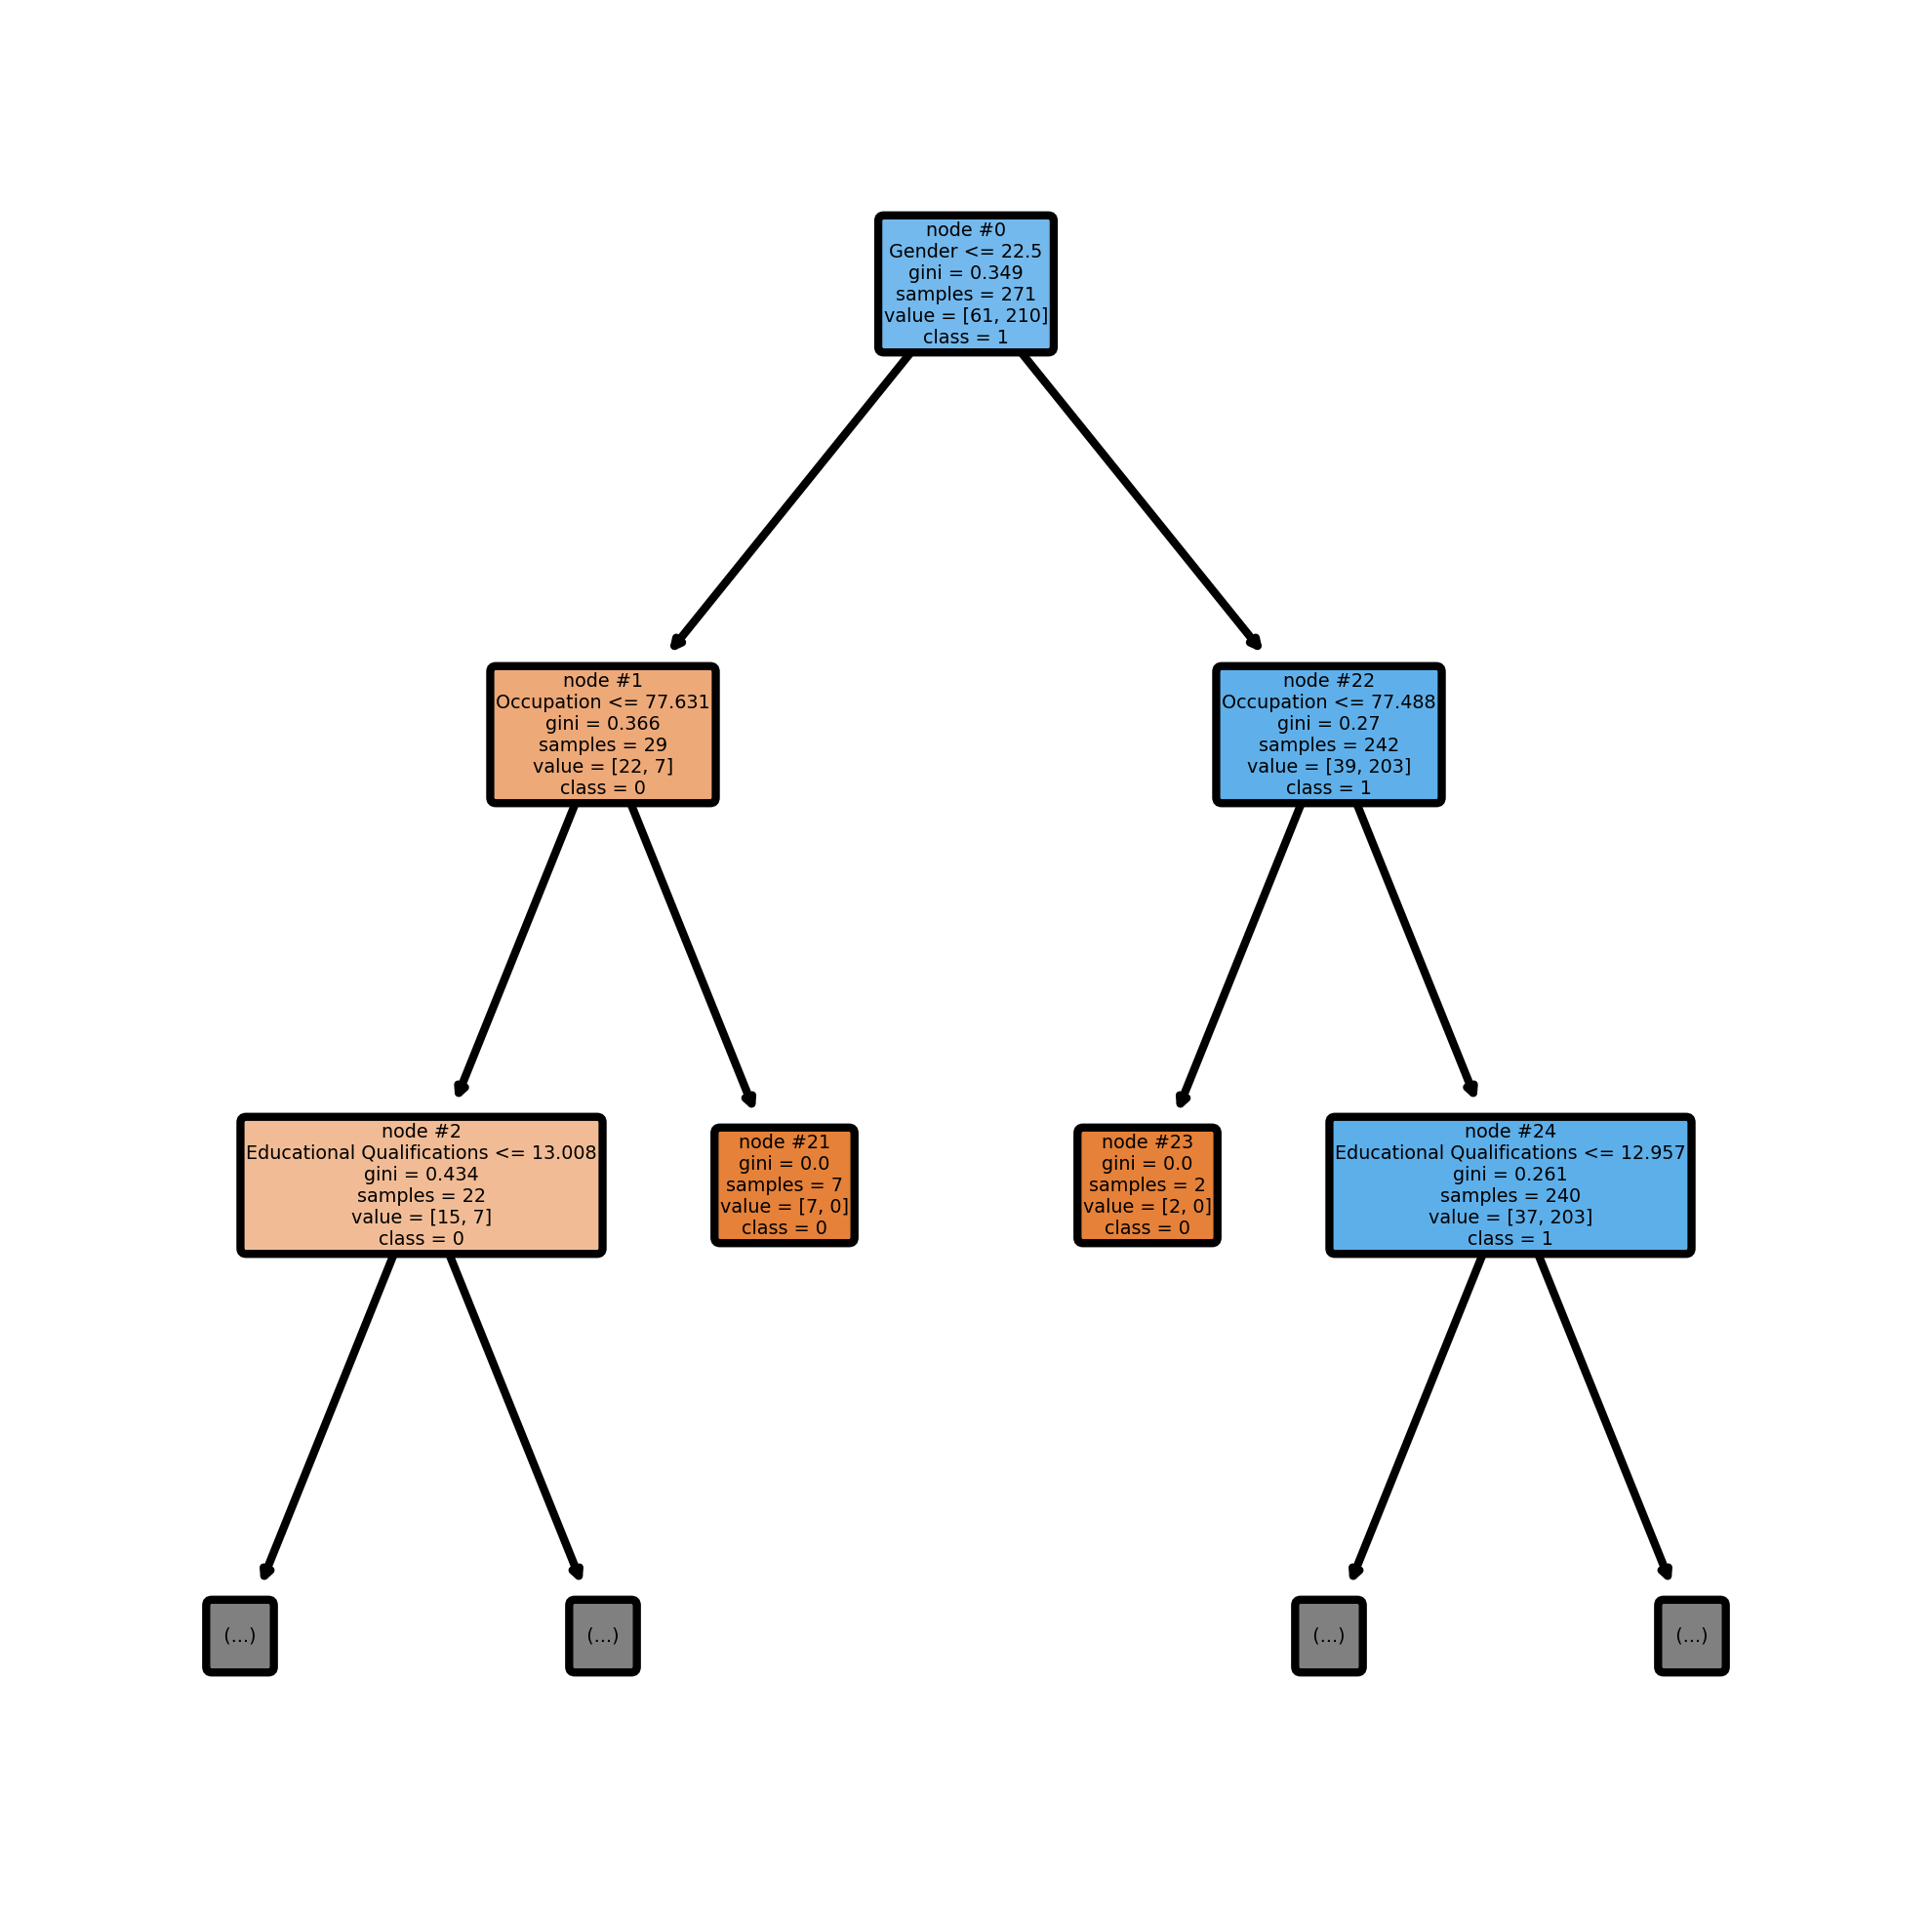

In [106]:
from sklearn import tree
import matplotlib.pyplot as plt

# Assuming 'dt' is your decision tree model
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=600)
tree.plot_tree(dt, max_depth=2,  # Draw up to depth of 3
               rounded=True,  # Rounded boxes
               filled=True,  # Boxes filled with color
               impurity=True,  # Show impurity level
               node_ids=True,  # Display node_id
               feature_names=['Gender', 'Marital Status', 'Occupation', 'Educational Qualifications', 
                              'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)', 'Preference(P1)', 
                              'Preference(P2)', 'Ease and convenient', 'Time saving', 'More restaurant choices', 
                              'Easy Payment option', 'More Offers and Discount', 'Good Food quality', 
                              'Good Tracking system', 'Self Cooking', 'Health Concern', 'Late Delivery', 
                              'Poor Hygiene', 'Bad past experience', 'Unavailability', 'Unaffordable', 
                              'Long delivery time', 'Delay of delivery person getting assigned', 
                              'Delay of delivery person picking up food', 'Wrong order delivered', 
                              'Missing item', 'Order placed by mistake', 'Influence of time', 'Order Time', 
                              'Residence in busy location', 'Google Maps Accuracy', 'Good Road Condition', 
                              'Delivery person ability', 'Influence of rating', 'High Quality of package', 
                              'Politeness', 'Freshness', 'Temperature', 'Good Taste', 'Good Quantity', 'Output'],
               class_names=["0", "1"]
              )
plt.show()

In [107]:
pip install catboost # installing the catboost function

Note: you may need to restart the kernel to use updated packages.


In [109]:
from catboost import CatBoostClassifier

# Initialize a CatBoostClassifier
model = CatBoostClassifier(iterations=10, learning_rate=0.1, depth=6)

# Fit the model (assuming you have your X_train and y_train ready)
model.fit(X_train, Y_train)

# Make predictions
predictions = model.predict(X_test)

0:	learn: 0.6637347	total: 169ms	remaining: 1.52s
1:	learn: 0.6385956	total: 171ms	remaining: 682ms
2:	learn: 0.6133777	total: 172ms	remaining: 400ms
3:	learn: 0.5896840	total: 172ms	remaining: 258ms
4:	learn: 0.5735291	total: 173ms	remaining: 173ms
5:	learn: 0.5574297	total: 174ms	remaining: 116ms
6:	learn: 0.5408733	total: 175ms	remaining: 74.8ms
7:	learn: 0.5250732	total: 175ms	remaining: 43.7ms
8:	learn: 0.5131992	total: 176ms	remaining: 19.5ms
9:	learn: 0.5015014	total: 176ms	remaining: 0us


In [ ]:
estimators = [] # Creates an empty list called estimators
estimators.append(("CatBoost", CatBoostClassifier())) # Adds a tuple to the estimators list. The tuple has two elements:
#The string "CatBoost" which is the name of the estimator.
#An instance of CatBoostClassifier(), which is a machine learning model for classification tasks.

In [111]:
CB = CatBoostClassifier(random_state=13) #The line CB = CatBoostClassifier(random_state=13) creates an instance of the CatBoostClassifier and assigns it to the variable CB

In [112]:
Y_pred2=model.predict(X_test) #The line Y_pred2 = model.predict(X_test) is used to make predictions on a test dataset using a trained machine learning model

In [113]:
from sklearn.metrics import confusion_matrix

# Assuming Y_test and Y_pred2 are already defined
cm = confusion_matrix(Y_test, Y_pred2) # This is used to evaluate the performance of a classification model by creating a confusion matrix.
print(cm)

[[ 7 19]
 [ 4 87]]


In [114]:
print("CatBoostPerformance :")
print('Accuracy_Score:' ,accuracy_score(Y_test, Y_pred2),",", "Precision_Score:",",",precision_score(Y_test, Y_pred2),",","Recall_Score:",recall_score(Y_test, Y_pred2),",","F1_Score:",f1_score(Y_test, Y_pred2))
# We're measuring how well our model did using different scores:
#accuracy_score: The percentage of correct predictions.
#precision_score: How often our model was right when it predicted a certain class.
#f1_score: A combination of precision and another metric (recall), giving a balanced measure of performance.

CatBoostPerformance :
Accuracy_Score: 0.8034188034188035 , Precision_Score: , 0.8207547169811321 , Recall_Score: 0.9560439560439561 , F1_Score: 0.8832487309644671
